# Problem Statement :

### 1. Load the dataset using the pandas module.

In [3]:
import pandas as pd

df = pd.read_csv("C:/Users/ASUS/Desktop/Intellipaat/Datasets/creditcard.txt")


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


### 2. Perform missing value analysis on the dataset.

In [5]:
missing_values = df.isnull().sum()
print(missing_values)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [13]:
df.fillna(0, inplace=True)

### 3. Calculate the number of genuine transactions, number of fraud transactions, and the percentage of fraud transactions.

In [14]:
num_genuine_transactions = df[df["Class"] == 0].shape[0]
num_fraud_transactions = df[df["Class"] == 1].shape[0]
percentage_fraud_transactions = (num_fraud_transactions / df.shape[0]) * 100

print("Number of Genuine Transactions:", num_genuine_transactions)
print("Number of Fraud Transactions:", num_fraud_transactions)
print("Percentage of Fraud Transactions:", percentage_fraud_transactions, "%")


Number of Genuine Transactions: 11616
Number of Fraud Transactions: 49
Percentage of Fraud Transactions: 0.42006000857265324 %


### 4. Visualize the genuine and fraudulent transactions using a bar graph.

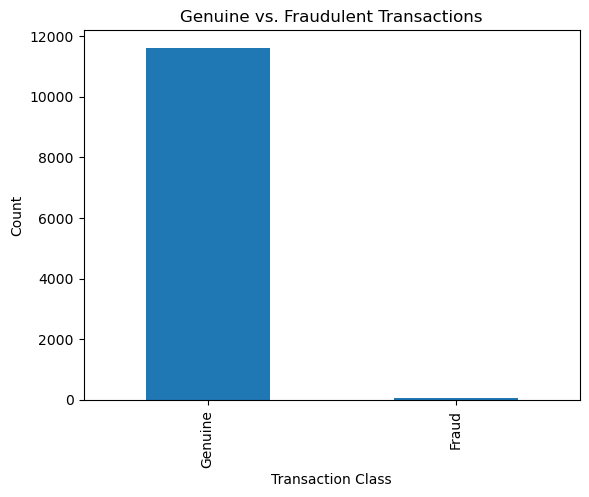

In [15]:
import matplotlib.pyplot as plt

fraud_counts = df["Class"].value_counts()
fraud_counts.plot(kind="bar")
plt.xticks([0, 1], labels=["Genuine", "Fraud"])
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.title("Genuine vs. Fraudulent Transactions")
plt.show()


### 5. Normalize the "Amount" column using the StandardScaler module.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))


### 6. Split the dataset into training and test sets with a 70:30 split ratio.


In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(["Class", "Amount"], axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 7. Train the decision tree and random forest models on the training set.

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### 8. Compare the predictions of both models using predict().

In [19]:
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

### 9. Compare the accuracy of both models using score().

In [20]:
accuracy_decision_tree = decision_tree_model.score(X_test, y_test)
accuracy_random_forest = random_forest_model.score(X_test, y_test)

print("Decision Tree Accuracy:", accuracy_decision_tree)
print("Random Forest Accuracy:", accuracy_random_forest)


Decision Tree Accuracy: 0.9988571428571429
Random Forest Accuracy: 0.9994285714285714


### 10. Check the performance matrix of both models and compare which model is having the highest performance.

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

print("Decision Tree Performance Metrics:")
print(classification_report(y_test, y_pred_decision_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_decision_tree))

print("Random Forest Performance Metrics:")
print(classification_report(y_test, y_pred_random_forest))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_random_forest))


Decision Tree Performance Metrics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3483
         1.0       0.88      0.88      0.88        17

    accuracy                           1.00      3500
   macro avg       0.94      0.94      0.94      3500
weighted avg       1.00      1.00      1.00      3500

Confusion Matrix:
[[3481    2]
 [   2   15]]
Random Forest Performance Metrics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3483
         1.0       1.00      0.88      0.94        17

    accuracy                           1.00      3500
   macro avg       1.00      0.94      0.97      3500
weighted avg       1.00      1.00      1.00      3500

Confusion Matrix:
[[3483    0]
 [   2   15]]
